In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

timg1 = cv2.imread("../images/timg1.jpg",cv2.IMREAD_UNCHANGED)
timg2 = cv2.imread("../images/timg2.jpg",cv2.IMREAD_UNCHANGED)
timg3 = cv2.imread("../images/timg3.jpg",cv2.IMREAD_UNCHANGED)
timg4 = cv2.imread("../images/timg4.jpg",cv2.IMREAD_UNCHANGED)


mean =  1/9 * np.array([[1, 1, 1,1,1],
                      [1, 1, 1,1,1],
                      [1, 1, 1,1,1],
                      [1, 1, 1,1,1],
                      [1, 1, 1,1,1]])


b_flt = cv2.filter2D(src=timg1, ddepth=-1, kernel=mean)
b_flt = cv2.filter2D(src=timg2, ddepth=-1, kernel=mean)
b_flt = cv2.filter2D(src=timg3, ddepth=-1, kernel=mean)
b_flt = cv2.filter2D(src=timg4, ddepth=-1, kernel=mean)


timg1 = cv2.cvtColor(timg1, cv2.COLOR_BGR2GRAY)
timg2 = cv2.cvtColor(timg2, cv2.COLOR_BGR2GRAY)
timg3 = cv2.cvtColor(timg3, cv2.COLOR_BGR2GRAY)
timg4 = cv2.cvtColor(timg4, cv2.COLOR_BGR2GRAY)


images = np.array([timg1 , timg2 , timg3 ,timg4 ] ,dtype=object)

timg1.shape # (63, 72)

(63, 72)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


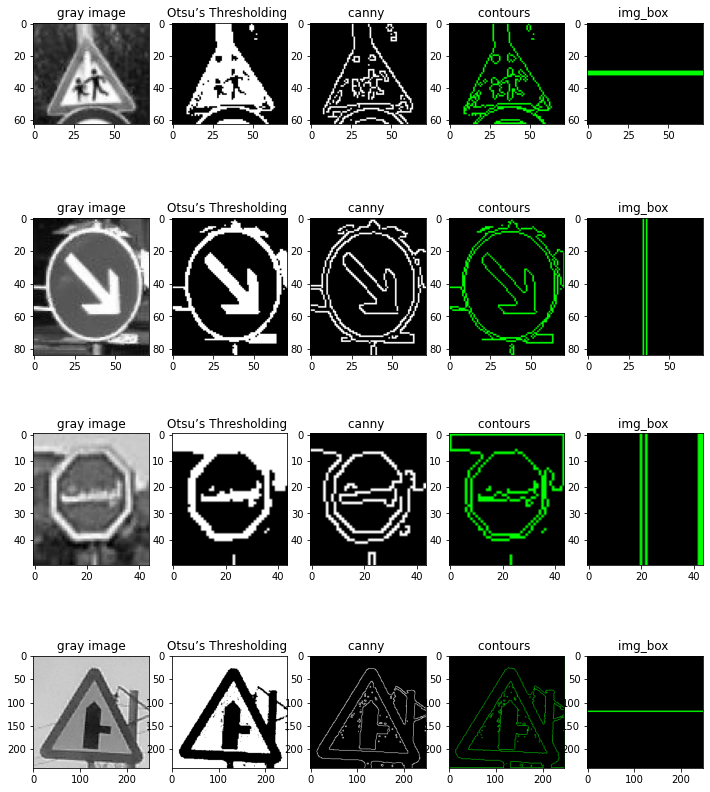

In [12]:
tresh_images = []
edge_images = []
fig, subplt = plt.subplots(4,5,figsize=(12,15))
for i,img in enumerate(images):
    otsu_threshold, image_otsu = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    tresh_images.append(image_otsu)
    canny = cv2.Canny(image_otsu,50,200, apertureSize=7)
    edge_images.append(canny)
    


    contours, hierarchy = cv2.findContours(image_otsu, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    img_contours = np.zeros((canny.shape[0],canny.shape[1],3))
    cv2.drawContours(img_contours, contours, -1, (0,255,0), 1)



    contours, hierarchy = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    img_box = np.zeros((canny.shape[0],canny.shape[1],3))
    cnt = contours[0]



    # rect = cv2.minAreaRect(cnt)
    # box = cv2.boxPoints(rect)
    # box = np.int0(box)
    # cv2.drawContours(img_box,[box],0,(0,0,255),2)


    # ellipse = cv2.fitEllipse(cnt)
    # cv2.ellipse(img_box,ellipse,(0,255,0),2)

    rows,cols = img_box.shape[:2]
    [vx,vy,x,y] = cv2.fitLine(cnt, cv2.DIST_L2,0,0.01,0.01)
    lefty = int((-x*vy/vx) + y)
    righty = int(((cols-x)*vy/vx)+y)
    cv2.line(img_box,(cols-1,righty),(0,lefty),(0,255,0),2)

    # (x,y),radius = cv2.minEnclosingCircle(cnt)
    # center = (int(x),int(y))
    # radius = int(radius)
    # cv2.circle(img_box,center,radius,(0,255,0),2)

    # x,y,w,h = cv2.boundingRect(cnt)
    # cv2.rectangle(img_box,(x,y),(x+w,y+h),(0,255,0),2)


    subplt[i][0].imshow(img,cmap='gray')
    subplt[i][0].set_title("gray image")
    subplt[i][1].imshow(image_otsu ,cmap='gray')
    subplt[i][1].set_title("Otsu’s Thresholding ")
    subplt[i][2].imshow(canny ,cmap='gray')
    subplt[i][2].set_title("canny ")
    subplt[i][3].imshow(img_contours ,cmap='gray')
    subplt[i][3].set_title("contours ")
    subplt[i][4].imshow(img_box ,cmap='gray')
    subplt[i][4].set_title("img_box ")
   

fig.savefig('Out_put.png')
   
